In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.stats import expon, gamma

from monte_carlo import uniform_mc, expon_mc, psi_2p_z

# Uniform sampling

In [2]:
ns = np.array([10**i for i in range(2, 9)])
ests = np.array([uniform_mc(n, sep=2, length=20) for n in ns])

Monte Carlo with 100 estimators
Monte Carlo with 1000 estimators
Monte Carlo with 10000 estimators
Monte Carlo with 100000 estimators
Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.10it/s]


Monte Carlo with 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.74it/s]


Monte Carlo with 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.84it/s]


In [3]:
ests

array([0.25902827, 0.68010077, 0.71894672, 0.73084587, 0.74437505,
       0.73715753, 0.73686028])

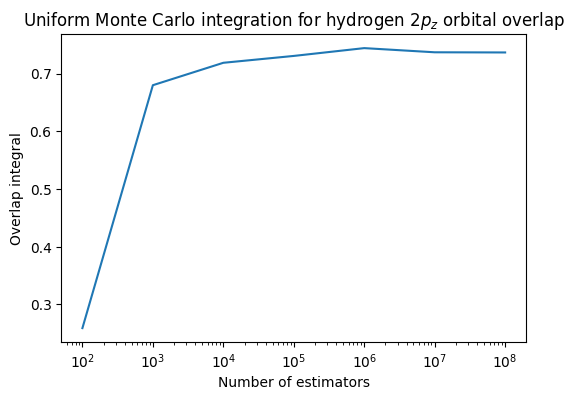

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.plot(ns, ests)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("Overlap integral")
ax.set_title("Uniform Monte Carlo integration for hydrogen $2p_z$ orbital overlap")
fig.savefig("uniform_monte_carlo.png", dpi=210)

The estimation quickly came close to the actual value when $n$ is increased from $10^2$ to $10^3$ and converges with $n\geq 10^7$ points to around 0.737.

# Importance sampling

## Look at function slices to determine a good distribution

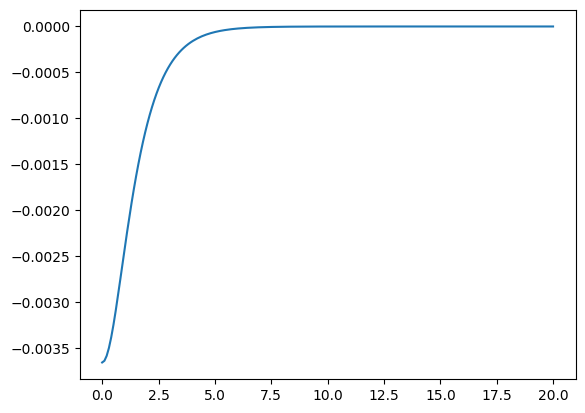

In [5]:
x = np.linspace(0, 20, 200)
y = np.zeros(len(x))
z = np.zeros(len(x))
sep = 2
overlap = psi_2p_z(x, y, z+sep/2)*psi_2p_z(x, y, z-sep/2)
plt.plot(x, overlap)

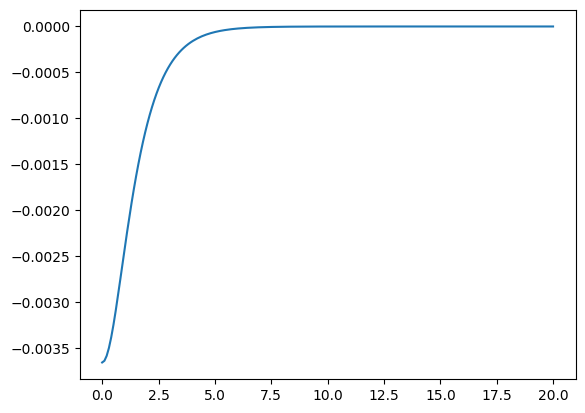

In [6]:
y = np.linspace(0, 20, 200)
x = np.zeros(len(y))
z = np.zeros(len(y))
sep = 2
overlap = psi_2p_z(x, y, z+sep/2)*psi_2p_z(x, y, z-sep/2)
plt.plot(y, overlap)

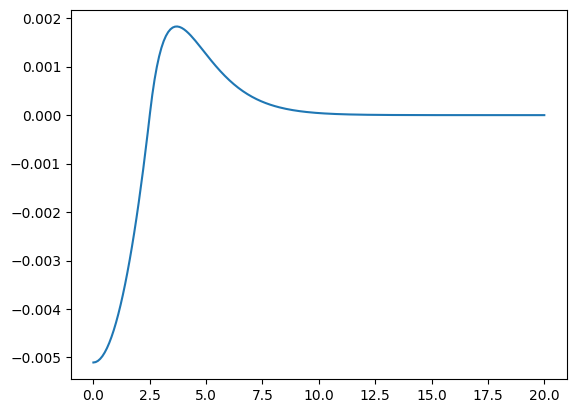

In [7]:
z = np.linspace(0, 20, 200)
x = np.zeros(len(z))
y = np.zeros(len(z))
sep = 5
overlap = psi_2p_z(x, y, z+sep/2)*psi_2p_z(x, y, z-sep/2)
plt.plot(z, overlap)

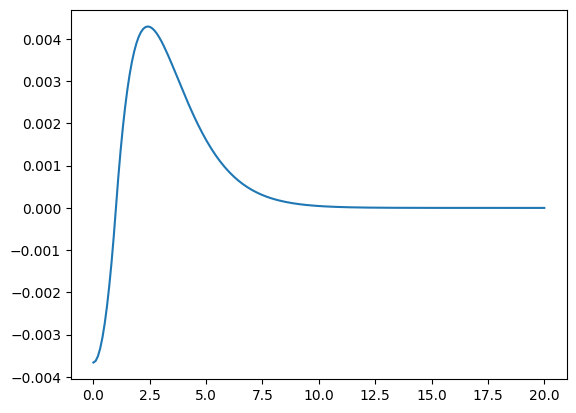

In [8]:
z = np.linspace(0, 20, 200)
x = np.zeros(len(z))
y = np.zeros(len(z))
sep = 2
overlap = psi_2p_z(x, y, z+sep/2)*psi_2p_z(x, y, z-sep/2)
plt.plot(z, overlap)

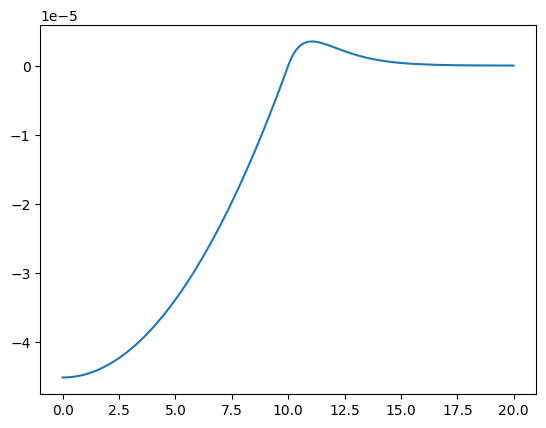

In [9]:
z = np.linspace(0, 20, 200)
x = np.zeros(len(z))
y = np.zeros(len(z))
sep = 20
overlap = psi_2p_z(x, y, z+sep/2)*psi_2p_z(x, y, z-sep/2)
plt.plot(z, overlap)

## Exponential seems good for x and y directions, and the gamma distribution could be used for the z direction

We could argue that the exponential distribution might be better for the z direction when the separation is large (most overlap happens around the origin), but the gamma distribution would work best for smaller separations. I also experimented with exponential along the z-axis, but the result hardly converged any quicker than random sampling. Let's try the gamma distribution for the z direction and exponential for x and y directions.

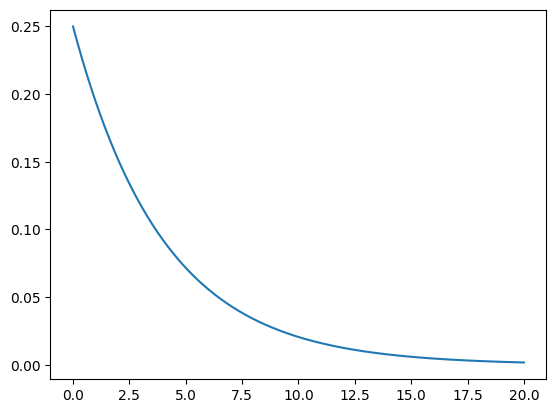

In [10]:
x = np.linspace(0, 20, 1000)
y = expon.pdf(x, scale=4)
plt.plot(x, y)

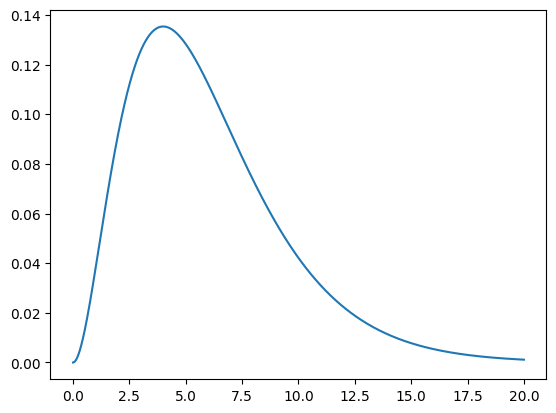

In [11]:
x = np.linspace(0, 20, 1000)
y = gamma.pdf(x, a=3, loc=0, scale=2)
plt.plot(x, y)

In [12]:
expon_ests = np.array([expon_mc(n, sep=2, length=20) for n in ns])

Monte Carlo with 100 estimators
Monte Carlo with 1000 estimators
Monte Carlo with 10000 estimators
Monte Carlo with 100000 estimators
Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.18it/s]


Monte Carlo with 10000000 estimators


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.08it/s]


Monte Carlo with 100000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.42it/s]


In [13]:
expon_ests

array([0.77395736, 0.73769041, 0.73167771, 0.75123353, 0.7408578 ,
       0.73702678, 0.73668944])

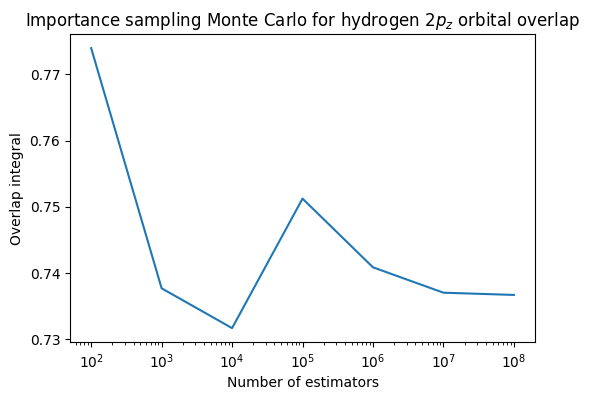

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.plot(ns, expon_ests)
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("Overlap integral")
ax.set_title("Importance sampling Monte Carlo for hydrogen $2p_z$ orbital overlap")
fig.savefig("expon_monte_carlo.png", dpi=210)

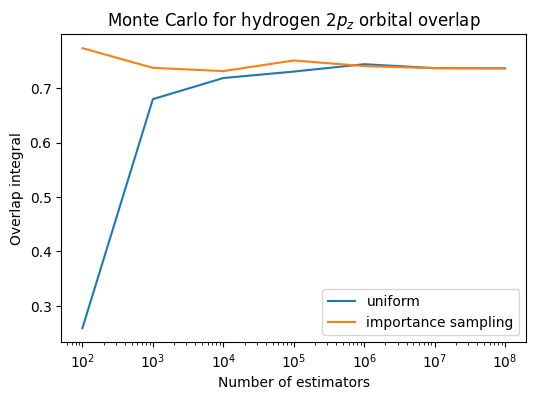

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.plot(ns, ests, label='uniform')
ax.plot(ns, expon_ests, label='importance sampling')
ax.set_xscale('log')
ax.set_xlabel("Number of estimators")
ax.set_ylabel("Overlap integral")
ax.set_title("Monte Carlo for hydrogen $2p_z$ orbital overlap")
ax.legend()
fig.savefig('contrast_monte_carlo.png', dpi=210)

The importance sampling method is much closer to the actual value with smaller $n$, demonstrating its better efficiency. It also converges to around 0.737 faster (already very close at $n=10^3$, although it fluctuates at $n=10^5$).

# Overlap integral as a functioon of separation distance

In [16]:
rs = np.linspace(0.5, 20, 40)
n = int(1e6)
overlaps = np.array([expon_mc(n, sep=r) for r in rs])

Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.83it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.02it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.79it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.68it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.17it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.01it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.90it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.90it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.77it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.57it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.76it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.53it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.61it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.89it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.56it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.44it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.82it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.54it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.58it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.58it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.31it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.49it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.57it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.56it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.10it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.26it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.53it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.36it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.53it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.60it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.39it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.37it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.90it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.31it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.69it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.88it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.53it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.59it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.65it/s]


Monte Carlo with 1000000 estimators


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.39it/s]


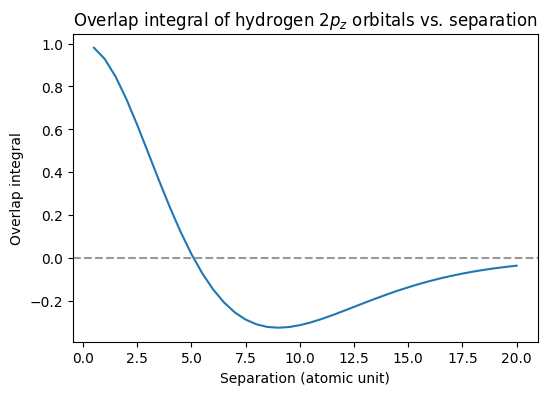

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(rs, overlaps)
ax.axhline(y=0, linestyle='--', color='grey', alpha=0.8)
ax.set_xlabel('Separation (atomic unit)')
ax.set_ylabel("Overlap integral")
ax.set_title('Overlap integral of hydrogen $2p_z$ orbitals vs. separation')
fig.savefig("overlap_v_sep.png", dpi=210)

The 2p orbitals are symmetrical cylindrically, but their phase changes across the center along the z-axis. When separation is small, the centers of the two 2p orbitals are close enough such that their lobes with the same phase could have significant overlap, resulting in a positive net overlap. As they move further along the z-axis, this same-phase overlap is replaced by the opposite-phase overlap, resulting in a negative net overlap. As they move even further from each other, their effective overlap approaches 0.
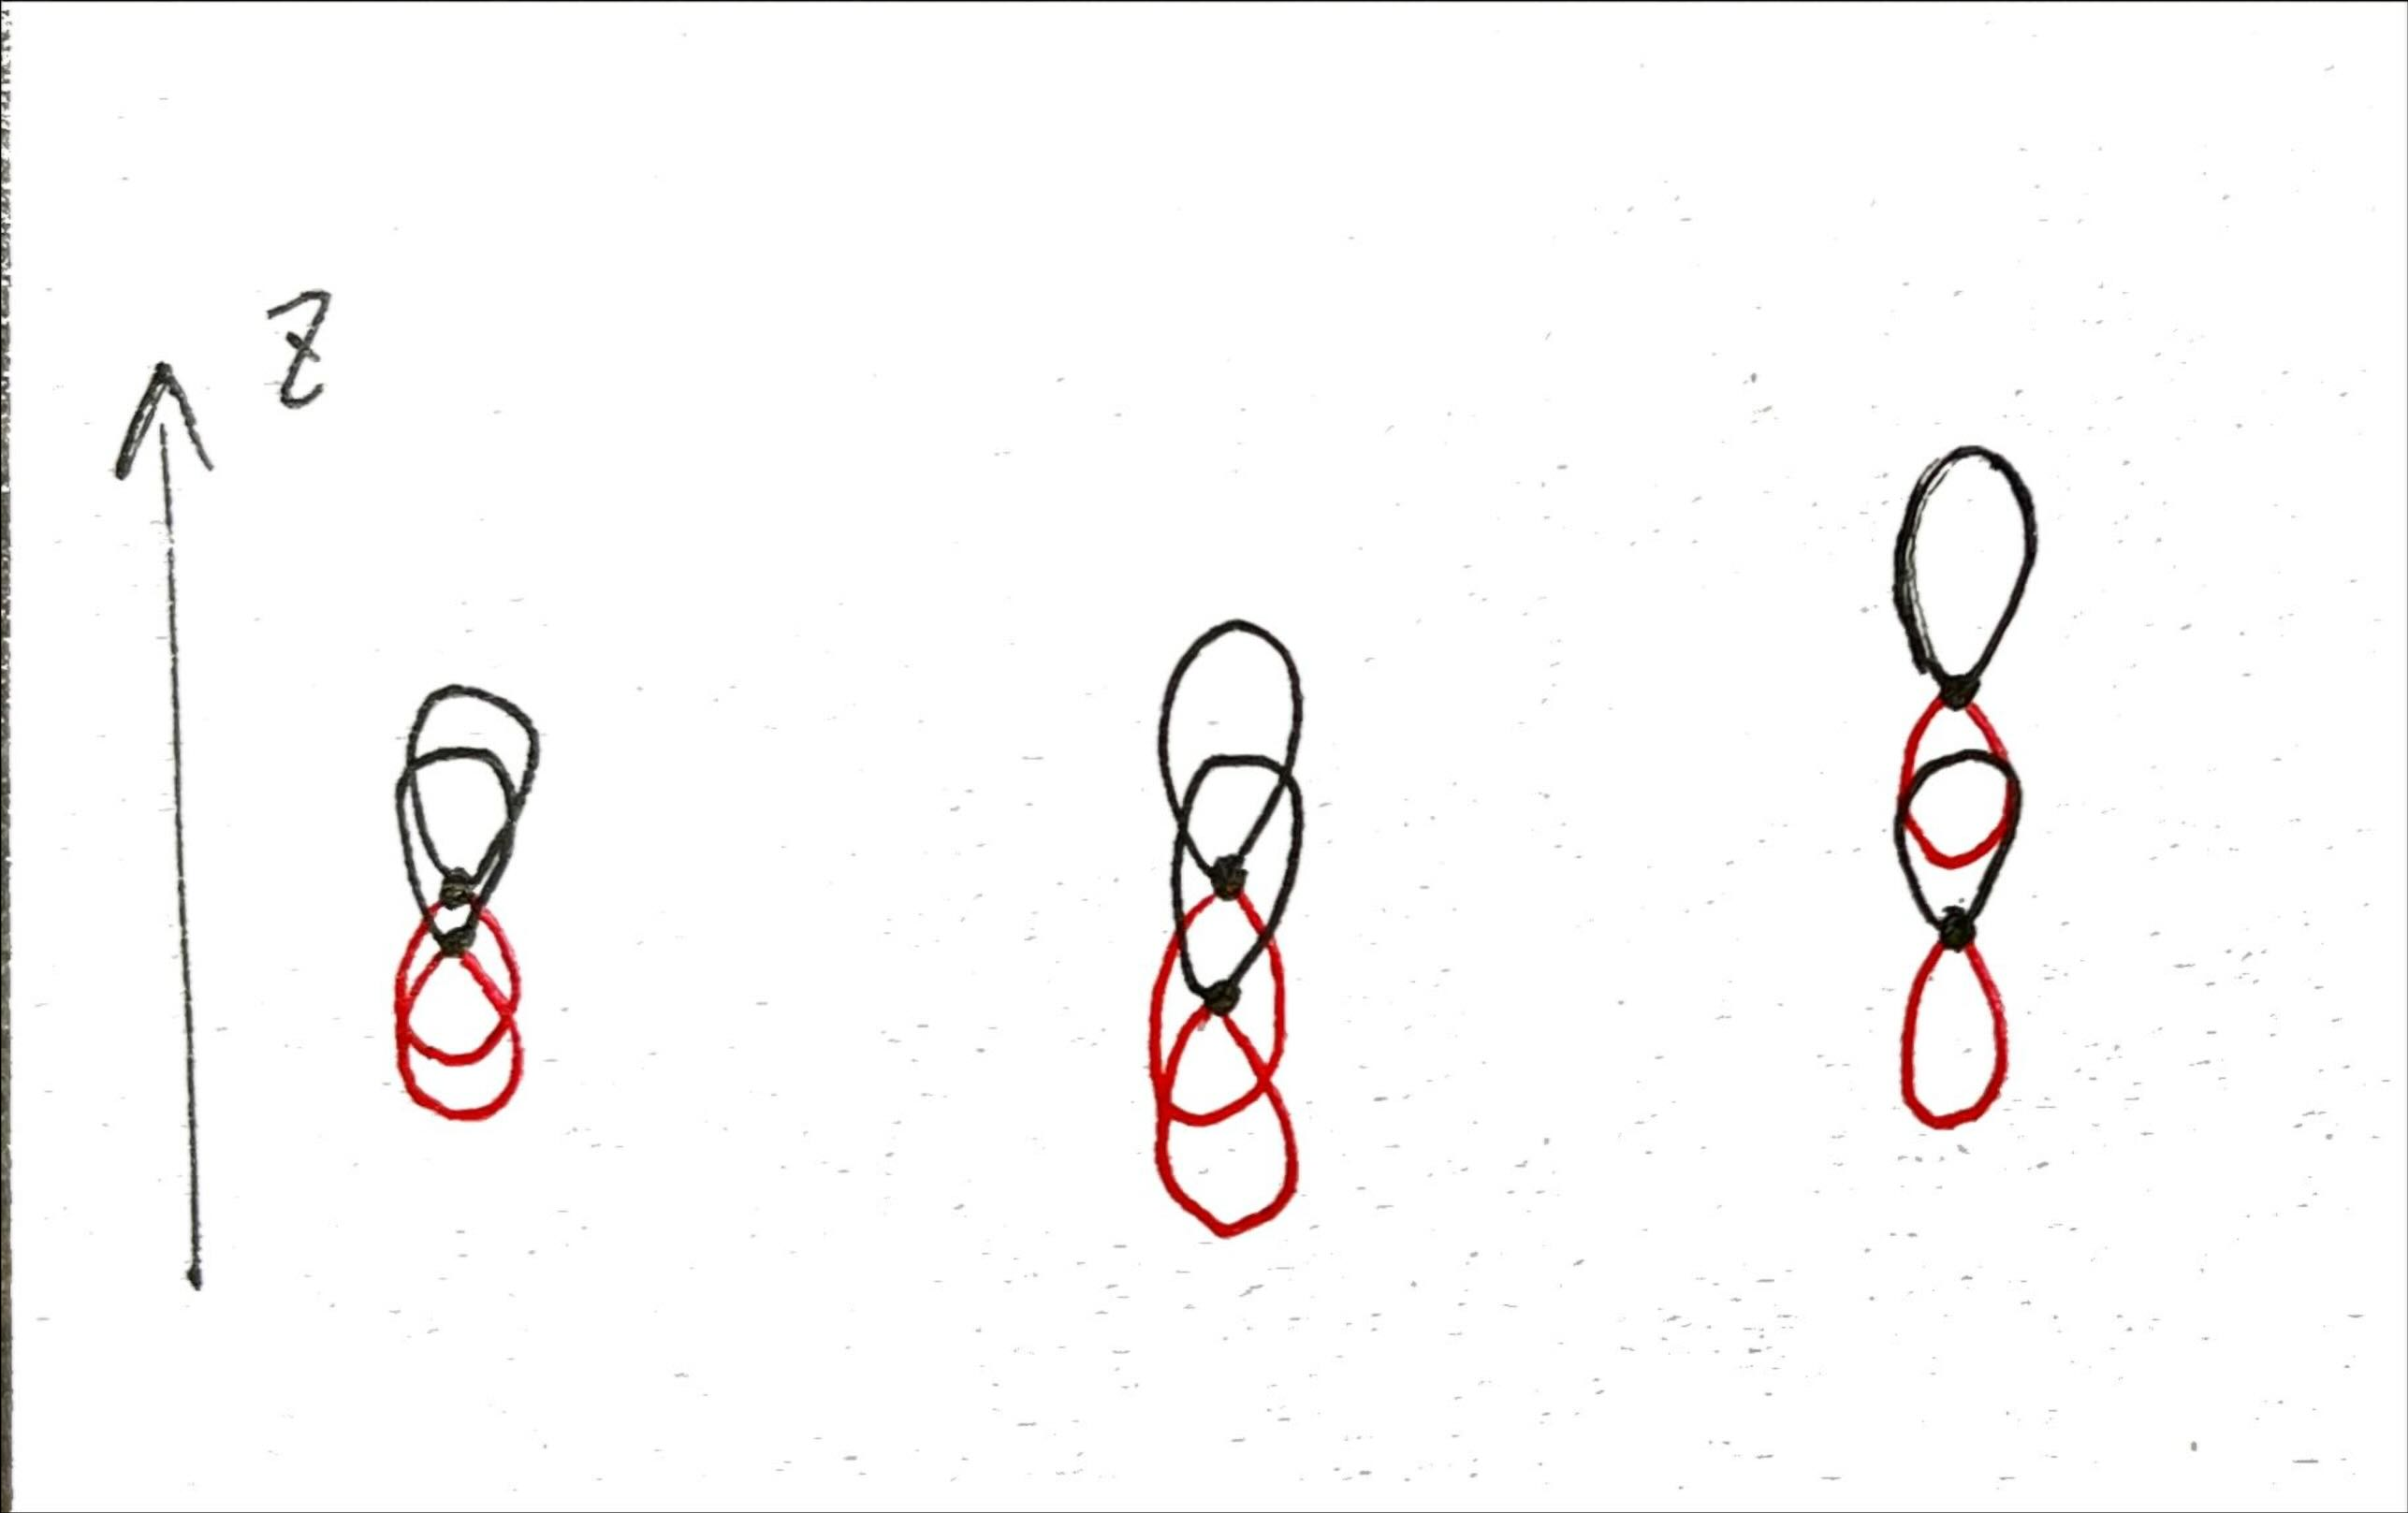
From left to right: net positive overlap, zero overlap, and net negative overlap as separation increases

# Discussion

Both uniform sampling and importance sampling converges the same actual value of the overlap integral. However, importance sampling is more efficient, since it weighs the probabilities of the sampled points by their contribution to the average, and makes those points with larger contribution more likely to be drawn. This saves a lot of effort drawing points with values close to 0 that don't actually contribute to the average, thereby improving the sampling efficiency and converges faster to the result.

The overlap integral quantifies the overlap between two orbitals. Since chemical bonding requires significant overlap between orbitals, the overlap integral can indicate bonding and bond strength. The overlap integral depends on the separation between two atoms, but it does not change monotonically with R. Its sign is determined by the relative phases of the overlapping orbitals. If the overlap is significant between the same phases, as is with $2p_z$ orbitals with small R, the overlap integral is positive. If the overlap is significant between opposite phases, as is with $2p_z$ orbitals with moderately larger R, the overlap integral is negative. When the two orbitals are so far away from each other that either one of the wavefunctions approachs 0 at the places where overlap occurs, the overlap integral approaches 0.